<a href="https://colab.research.google.com/github/SajawalHassan/Housing-price-analysis/blob/main/Housing_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np, seaborn as sns, statsmodels.api as sm, statsmodels.formula.api as smf, matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import math
import warnings

pd.set_option("display.max_columns", 300)
pd.set_option('display.max_rows', 300)

In [ ]:
label = "SalePrice"

df = pd.read_csv("https://www.ishelp.info/data/housing_full.csv")

for col in df:
  if col[0].isdigit():
    nums = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
    df.rename(columns={col: nums[int(col[0])] + f"_{col}"}, inplace=True)

df.drop(columns=["Id"], inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,one_1stFlrSF,two_2ndFlrSF,LowQualFinSF,TotalSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.000000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.000000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.000000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.000000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.000000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.000000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6

# Univariate Stats

In [ ]:
def univariate(df):
  output_df = pd.DataFrame(columns=["Count", "Missing values", "Unique", "Dtype", "is_numeric", "Mean", "Median", "Mode", "1Q", "2Q", "3Q", "Min", "Max", "Std", "Skew", "Kurtosis"])

  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
      output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].unique().sum(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mean(),
                            df[col].median(), df[col].mode()[0],  df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].min(), df[col].max(), df[col].std(),
                            df[col].skew(), df[col].kurt()]
    else:
      output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"]

  output_df.sort_values(by=["is_numeric", "Skew", "Unique"], ascending=False, inplace=True)
  return output_df

univariate_df = univariate(df)

In [ ]:
univariate_df

,Count,Missing values,Unique,Dtype,is_numeric,Mean,Median,Mode,1Q,2Q,3Q,Min,Max,Std,Skew,Kurtosis
MiscVal,1460,0,42364.0,int64,True,43.489041,0.0,0,0.0,0.0,0.0,0,15500,496.123024,24.476794,701.003342
PoolArea,1460,0,4028.0,int64,True,2.758904,0.0,0,0.0,0.0,0.0,0,738,40.177307,14.828374,223.268499
LotArea,1460,0,12156992.0,int64,True,10516.828082,9478.5,7200,7553.5,9478.5,11601.5,1300,215245,9981.264932,12.207688,203.243271
three_3SsnPorch,1460,0,4102.0,int64,True,3.409589,0.0,0,0.0,0.0,0.0,0,508,29.317331,10.304342,123.662379
LowQualFinSF,1460,0,8013.0,int64,True,5.844521,0.0,0,0.0,0.0,0.0,0,572,48.623081,9.011341,83.234817
KitchenAbvGr,1460,0,6.0,int64,True,1.046575,1.0,1,1.0,1.0,1.0,0,3,0.220338,4.488397,21.532404
BsmtFinSF2,1460,0,60994.0,int64,True,46.549315,0.0,0,0.0,0.0,0.0,0,1474,161.319273,4.255261,20.113338
ScreenPorch,1460,0,14943.0,int64,True,15.060959,0.0,0,0.0,0.0,0.0,0,480,55.757415,4.122214,18.439068
BsmtHalfBath,1460,0,3.0,int64,True,0.057534,0.0,0,0.0,0.0,0.0,0,2,0.238753,4.103403,16.396642
EnclosedPorch,1460,0,19149.0,int64,True,21.95411,0.0,0,0.0,0.0,0.0,0,552,61.119149,3.089872,10.430766


In [ ]:
df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu", "LotFrontage"], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,one_1stFlrSF,two_2ndFlrSF,LowQualFinSF,TotalSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1334,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1335,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1336,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
def create_problem_cols_df(df, label):
  problem_cols = pd.DataFrame(columns=["-"])

  for col in df:
    problem_cols.loc[col] = None

  problem_cols_indexes = []

  for i in range(len(problem_cols.iloc[:]) - 1):
    problem_cols_indexes.append(pd.Index(problem_cols.iloc[i]).name)

  return problem_cols_indexes, problem_cols

problem_cols_indexes, problem_cols = create_problem_cols_df(df, label)
print(problem_cols_indexes[:5])
problem_cols.head()

['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape']


,-
MSSubClass,NaN
MSZoning,NaN
LotArea,NaN
Street,NaN
LotShape,NaN


In [ ]:
def get_high_skew_cols(problem_df, df, skewness_threshold=1):
  initial_arr = [None] * len(problem_df)
  new_col_name = "skewness"

  for i, col in enumerate(df.columns):
    if not pd.api.types.is_numeric_dtype(df[col]): continue # feature is not numeric

    if abs(df[col].skew()) > skewness_threshold:
      initial_arr[i] = df[col].skew()

  if new_col_name not in problem_df.columns:
    problem_df.insert(len(problem_df.columns), new_col_name, initial_arr)
  else:
    problem_df[new_col_name] = initial_arr

  return problem_df

get_high_skew_cols(problem_cols, df)

if "-" in problem_cols.columns: problem_cols.drop(columns=["-"], axis=1, inplace=True)

problem_cols.sort_values(by=["skewness"], ascending=False)

,skewness
MiscVal,24.632578
PoolArea,14.187832
LotArea,11.938124
LowQualFinSF,10.566815
three_3SsnPorch,10.096553
KitchenAbvGr,5.943561
BsmtFinSF2,4.146519
ScreenPorch,3.916848
BsmtHalfBath,3.847909
EnclosedPorch,3.205286


# Bivariate statistics



## Correlation
Countinous numeric to Countinous numeric: Correlation

Categorical to Countinous numeric: T-test (2 groups), ANOVA (2+ groups)

Categorical to Categorical: Chi-square test

In [ ]:
def calc_anova(df, feature_col, label_col):
  groups = df[feature_col].unique()
  combined_groups = []

  for group in groups:
    combined_groups.append(df[df[feature_col] == group][label_col])

  if len(combined_groups) < 2:
    print("ANOVA could not be calculated. Passing...")
    return None, None
  anova_oneway = stats.f_oneway(*combined_groups)
  return anova_oneway

In [ ]:
def bivariate(df, label):
  output_df = pd.DataFrame(columns=["Stat", "+/-", "Effect Size", "P-value"])

  for col_name in df:
    if col_name == label: continue

    if pd.api.types.is_numeric_dtype(df[col_name]): # is numeric
      r, p = stats.pearsonr(df[label], df[col_name])

      if r > 0: output_df.loc[col_name] = ["R", "+", abs(round(r, 6)), round(p, 6)]
      else: output_df.loc[col_name] = ["R", "-", abs(round(r, 6)), round(p, 6)]
    else: # is categorical
      f, p = calc_anova(df, col_name, label)
      output_df.loc[col_name] = ["F", "+", f, p]

  return output_df.sort_values(by=["Effect Size", "Stat"], ascending=False)

pd.options.display.float_format = '{:.6f}'.format
bivariate_df = bivariate(df, "SalePrice")
bivariate_df

,Stat,+/-,Effect Size,P-value
ExterQual,F,+,378.084437,0.000000
BsmtQual,F,+,365.536562,0.000000
KitchenQual,F,+,357.873320,0.000000
GarageFinish,F,+,236.659528,0.000000
Foundation,F,+,104.676631,0.000000
HeatingQC,F,+,76.421238,0.000000
BsmtExposure,F,+,69.783814,0.000000
GarageType,F,+,67.012717,0.000000
BsmtFinType1,F,+,64.188359,0.000000
Neighborhood,F,+,60.889570,0.000000


In [ ]:
def get_high_p_val_cols(problem_df, df, p_threshold=0.05):
  initial_arr = [None] * len(problem_df)
  label = "SalePrice"
  new_col_name = "p_value"

  for i, col in enumerate(df.columns):
    if not pd.api.types.is_numeric_dtype(df[col]): continue # feature is not numeric

    _, col_p_value = stats.pearsonr(df[label], df[col])

    if col_p_value > p_threshold:
      initial_arr[i] = col_p_value

  if new_col_name not in problem_df.columns:
    problem_df.insert(len(problem_df.columns), new_col_name, initial_arr)
  else:
    problem_df[new_col_name] = initial_arr

  return problem_df

get_high_p_val_cols(problem_cols, df).sort_values(by=["p_value"], ascending=False)

,skewness,p_value
LowQualFinSF,10.566815,0.714980
MiscVal,24.632578,0.534645
YrSold,NaN,0.454792
BsmtHalfBath,3.847909,0.270035
BsmtFinSF2,4.146519,0.253700
MoSold,NaN,0.130971
three_3SsnPorch,10.096553,0.123231
MSSubClass,1.391901,NaN
MSZoning,NaN,NaN
LotArea,11.938124,NaN


## Heteroscedasticity

In [ ]:
def heteroscedasticity(df, feature, label):
  model = smf.ols(f'Q("{label}")~Q("{feature}")', data=df).fit()

  test_white = het_white(model.resid, model.model.exog)
  test_bp = het_breuschpagan(model.resid, model.model.exog)

  output_df = pd.DataFrame(columns=["LM p-stat", "F-stat p-value"])
  output_df.loc["white"] = [test_white[1], test_white[-1]]
  output_df.loc["breuschpagan"] = [test_bp[1], test_bp[-1]]

  return output_df

In [ ]:
def get_high_het_p_cols(problem_df, df):
  het_initial_arr = [None] * len(problem_df)

  # Initialize starting arrays
  white_lm_arr = het_initial_arr
  white_f_arr = het_initial_arr
  breusch_lm_arr = het_initial_arr
  breusch_f_arr = het_initial_arr
  for i, col in enumerate(df):
    if col in problem_df.index.tolist() == False: continue # feature is not in problem columns
    if pd.api.types.is_numeric_dtype(df[col]) == False: continue # feature is numeric

    p_threshold = 0.05

    try: het_df = heteroscedasticity(pd.DataFrame(df[label]).join(pd.DataFrame(df[col])), col, label)
    except: pass
    het_white_lm = het_df.iloc[0][0]
    het_white_f = het_df.iloc[0][1]
    het_breusch_lm = het_df.iloc[1][0]
    het_breusch_f = het_df.iloc[1][1]

    # All p-values are below the p-threshold
    if het_white_lm < p_threshold and het_white_f < p_threshold and het_breusch_lm < p_threshold and het_breusch_f < p_threshold:
      white_lm_arr[i] = het_white_lm
      white_f_arr[i] = het_white_f

      breusch_lm_arr[i] = het_breusch_lm
      breusch_f_arr[i] = het_breusch_f

  white_lm_name = "white_lm_p"
  white_f_name = "white_f_p"
  breusch_lm_name = "breusch_lm_p"
  breusch_f_name = "breusch_f_p"

  if white_lm_name not in problem_df: problem_df.insert(len(problem_df.columns), white_lm_name, white_lm_arr)
  else: problem_df[white_lm_name] = white_lm_arr

  if white_f_name not in problem_df: problem_df.insert(len(problem_df.columns), white_f_name, white_f_arr)
  else: problem_df[white_f_name] = white_f_arr

  if breusch_lm_name not in problem_df: problem_df.insert(len(problem_df.columns), breusch_lm_name, breusch_lm_arr)
  else: problem_df[breusch_lm_name] = breusch_lm_arr

  if breusch_f_name not in problem_df: problem_df.insert(len(problem_df.columns), breusch_f_name, breusch_f_arr)
  else: problem_df[breusch_f_name] = breusch_f_arr

  return problem_df

get_high_het_p_cols(problem_cols, df).sort_values(by=["white_lm_p", "white_f_p", "breusch_lm_p", "breusch_f_p"])

,skewness,p_value,white_lm_p,white_f_p,breusch_lm_p,breusch_f_p
TotalSF,1.430307,NaN,0.000000,0.000000,0.000000,0.000000
TotalBsmtSF,2.214029,NaN,0.000000,0.000000,0.000000,0.000000
one_1stFlrSF,1.397431,NaN,0.000000,0.000000,0.000000,0.000000
TotRmsAbvGrd,NaN,NaN,0.000000,0.000000,0.000000,0.000000
GarageArea,NaN,NaN,0.000000,0.000000,0.000000,0.000000
OverallQual,NaN,NaN,0.000000,0.000000,0.000000,0.000000
GarageCars,NaN,NaN,0.000000,0.000000,0.000000,0.000000
MasVnrArea,2.582685,NaN,0.000000,0.000000,0.000000,0.000000
Fireplaces,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BsmtFinSF1,1.693397,NaN,0.000000,0.000000,0.000000,0.000000


## Bivariate visualizations

In [ ]:
def scatter(feature, label):
  m, b, r, p, err = stats.linregress(feature, label)
  try: het_df = heteroscedasticity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name)
  except: pass

  textstr = f"""y = {str(round(m, 2))}x + {str(round(b, 2))}
r = {round(r, 3)}
r2 = {round(r**2, 3)}
p = {round(p, 3)}
{feature.name} skew = {str(round(feature.skew(), 2))}
{label.name} skew = {str(round(label.skew(), 2))}
{het_df}"""

  sns.set(color_codes=True)
  ax = sns.jointplot(x=feature, y=label, kind="reg")
  ax.fig.text(1, 0.1, textstr, fontsize=12)
  ax.fig.set_size_inches(3.5, 3.5)
  plt.show()
  ax.cla()

  return het_df

def bivariate_viz(df, col_name, label):
  if col_name == label: return

  if pd.api.types.is_numeric_dtype(df[col_name]): # is numeric

    try: het_df = scatter(df[col_name], df[label])
    except: pass

pd.options.display.float_format = '{:.6f}'.format

In [ ]:
def bar_chart(df, feature, label, unconducted_ttests):
  if pd.api.types.is_numeric_dtype(df[feature]): return # skip if col is numeric

  unique_groups = df[feature].unique()

  text_str = ""

  conducted_ttests = []
  combined_groups = []

  for i1, group_1 in enumerate(unique_groups):
    combined_groups.append(df[df[feature] == group_1][label]) # Get groups for ANOVA

    # Conduct ttests
    for i2, group_2 in enumerate(unique_groups):
      if i2 > i1: # Not conduct unneeded ttests
        sample_1, sample_2 = df[df[feature] == group_1][label], df[df[feature] == group_2][label]

        if len(sample_1) < 2 or len(sample_2) < 2:
          print(f"column: {feature}, '{group_1}' n = {len(sample_1)}, '{group_2}' n = {len(sample_2)}, t_test cannot be conducted; passing...")
          if feature not in unconducted_ttests: unconducted_ttests.append(feature)

        else:
          t, p = stats.ttest_ind(sample_1, sample_2)
          conducted_ttests.append([group_1, group_2, round(t, 6), round(p, 6)])

  anova_oneway = stats.f_oneway(*combined_groups)

  # Create text string
  text_str += "                        ANOVA \n"
  text_str += f"f: {round(anova_oneway[0], 3)} \n"
  text_str += f"p: {round(anova_oneway[1], 3)} \n"

  if len(conducted_ttests) > 0:
    p_threshold = 0.05 / len(conducted_ttests) # Bonferroni calculated p-value
  else:
    p_threshold = 0.05

  text_str += f"\nBonferroni sig. ttests, p={round(p_threshold, 6)} \n"
  for ttest in conducted_ttests:
    if ttest[3] < p_threshold:
      text_str += f"{ttest[0]}-{ttest[1]}: t: {ttest[2]}, p: {ttest[3]} \n"

  sns.set(color_codes=True)
  ax = sns.barplot(data=df, x=feature, y=label)

  ax.text(1, 0.1, text_str, fontsize=12, transform=plt.gcf().transFigure)
  ax.figure.set_size_inches(3.5, 3.5)
  plt.show()
  ax.cla()

In [ ]:
unconducted_ttests = []
for col in df:
  bivariate_viz(df, col, label)
  bar_chart(df, col, label, unconducted_ttests)

# Multivariate statistics (MLR)

In [ ]:
df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu", "LotFrontage"], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)

In [ ]:
def mlr_prepare(df):
  for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]): # is categorical
      df = df.join(pd.get_dummies(df[col], prefix=col, prefix_sep="-", drop_first=False, dtype=np.int64))

  df = df.select_dtypes(np.number)
  df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)
  return df

## Multicollinearity

In [ ]:
def multicollinearity(df, label):
  vif_dict, tol_dict = {}, {}

  for col in df:
    if col == label: continue

    y = df[col]
    X = df.drop(columns=[col])

    R2 = LinearRegression().fit(X, y).score(X, y) # perform auxiliary regression
    if R2 < 1:
      vif = 1 / (1 - R2)
    else:
      vif = -100
    vif_dict[col] = vif

    tol = 1 - R2
    tol_dict[col] = tol

    df_output = pd.DataFrame({"VIF": vif_dict, "Tolerance": tol_dict})

  return df_output

multicollinearity_df = multicollinearity(df_minmax, label)
multicollinearity_df.sort_values(by=["VIF"], ascending=False).head()

,VIF,Tolerance
MSSubClass,35.7047597698,0.0280074703
YearBuilt,17.6762889338,0.0565729607
GarageYrBlt,6.6252179067,0.1509384316
TotRmsAbvGrd,6.3612751997,0.1572011851
GarageArea,5.8107671507,0.1720943163


In [ ]:
def remove_multicollinear_cols(df, multicollinearity_df, label, determinator="v", vif_threshold=4, tolerance_threshold=0.1):
  if determinator == "v":
    for col_vif in multicollinearity_df["VIF"].loc[:]:
      col_name = multicollinearity_df[multicollinearity_df["VIF"].round(6) == round(col_vif, 6)].iloc[0].name
      if col_name == label: continue
      if col_name not in df.columns: continue

      if col_vif > vif_threshold:
        df.drop(columns=[col_name], axis=1, inplace=True)
        multicollinearity_df.drop(index=[col_name], axis=0, inplace=True)
  else:
    for col_tol in multicollinearity_df["Tolerance"].loc[:]:
      col_name = multicollinearity_df[multicollinearity_df["Tolerance"].round(6) == round(col_tol, 6)].iloc[0].name
      if col_name == label: continue
      if col_name not in df.columns: continue
      if col_tol == 0: continue

      if col_tol < tolerance_threshold:
        df.drop(columns=[col_name], axis=1, inplace=True)
        multicollinearity_df.drop(index=[col_name], axis=0, inplace=True)

  return df

remove_multicollinear_cols(df_minmax, multicollinearity_df, label, vif_threshold=5)

,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,one_1stFlrSF,two_2ndFlrSF,LowQualFinSF,TotalSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondi

In [ ]:
multicollinearity_df.sort_values(by=["VIF"], ascending=False).head()

,VIF,Tolerance
FullBath,4.425375,0.225970
KitchenAbvGr,4.293753,0.232896
YearRemodAdd,3.950499,0.253133
LotArea,3.578869,0.279418
BedroomAbvGr,3.427828,0.291730


## Feature removal based on mlr

In [ ]:
def mlr(df, label):
  y = df[label]
  X = df.drop(columns=[label]).assign(const=1)

  results = sm.OLS(y, X).fit()
  return results

In [ ]:
def mlr_features(results):
  feature_df = pd.DataFrame(data={"coef": results.params, "t": abs(results.tvalues), "p": results.pvalues})
  feature_df.drop(labels=["const"], inplace=True)
  return feature_df.sort_values(by=["t", "p"])

In [ ]:
"""
Returns the following coefficients of the results:
R2, adjR2, R2_adjR2_diff, MAE, RMSE, features
"""
def mlr_fit_stats(results, label_values, round_val=10, make_dict=False):
  R2 = round(results.rsquared, 10)
  adjR2 = round(results.rsquared_adj, 10)
  R2_adjR2_diff = round(results.rsquared - results.rsquared_adj, round_val)

  fitted_values = np.array(results.fittedvalues)
  label_values = np.array(label_values)

  MAE = round(np.mean(abs(fitted_values - label_values)), round_val)
  RMSE = round(np.sqrt(sum((label_values - fitted_values)**2) / len(label_values)), round_val)

  df_features = mlr_features(results)
  fit_stats = [R2, adjR2, R2_adjR2_diff, MAE, RMSE, [df_features.index.values]]

  if make_dict:
    fit_dict = {
        "R2": R2,
        "adjR2": adjR2,
        "R2_adjR2_diff": R2_adjR2_diff,
        "MAE": MAE,
        "RMSE": RMSE,
        "Features": [df_features.index.values]
    }

    return fit_stats, fit_dict

  return fit_stats

In [ ]:
"""
Removes the lowest contributing column from given dataframe repeatedly until it reaches a min cols required and records fit stats of each version of the dataframe
"""
def mlr_step(df, label, min=2):
  df_models = pd.DataFrame(columns=["R2", "adjR2", "R2_adjR2_diff", "MAE", "RMSE", "Features"])

  df_prepared = mlr_prepare(df) # prepare for mlr

  results = mlr(df_prepared, label) # generate mlr results

  df_models.loc[str(len(results.params))] = mlr_fit_stats(results, df_prepared[label]) # add df_prepared to df_models

  df_features = mlr_features(results)
  while len(results.params) >= min:
    df_prepared = df_prepared.drop(columns=[df_features.index[0]])
    results = mlr(df_prepared, label)
    df_features = mlr_features(results)
    df_models.loc[str(len(results.params))] = mlr_fit_stats(results, df_prepared[label])

  return df_models

In [ ]:
pd.options.display.float_format = '{:.10f}'.format
df_models = mlr_step(df, label)
df_models

,R2,adjR2,R2_adjR2_diff,MAE,RMSE,Features
261,0.9279822188,0.9138749791,0.0141072398,0.0186886607,0.0294147980,"[[Electrical-FuseP, MSZoning-RH, Exterior1st-S..."
260,0.9279822188,0.9138749791,0.0141072398,0.0186886607,0.0294147980,"[[MSZoning-RH, Exterior1st-Stucco, Exterior2nd..."
259,0.9279822188,0.9138749791,0.0141072398,0.0186886607,0.0294147980,"[[Exterior1st-Stucco, Exterior2nd-MetalSd, Ext..."
258,0.9279822188,0.9138749791,0.0141072398,0.0186886607,0.0294147980,"[[Exterior2nd-MetalSd, Exterior1st-Wd Sdng, Ga..."
257,0.9279822188,0.9138749791,0.0141072398,0.0186886607,0.0294147980,"[[Exterior1st-Wd Sdng, GarageType-Detchd, Neig..."
256,0.9279821967,0.9139519186,0.0140302780,0.0186890299,0.0294148025,"[[GarageType-Detchd, Neighborhood-Blmngtn, Hal..."
255,0.9279821967,0.9139519186,0.0140302780,0.0186890299,0.0294148025,"[[Neighborhood-Blmngtn, HalfBath, Neighborhood..."
254,0.9279821967,0.9139519186,0.0140302780,0.0186890299,0.0294148025,"[[HalfBath, SaleType-CWD, Neighborhood-BrkSide..."
253,0.9279820905,0.9140286206,0.0139534700,0.0186888833,0.0294148242,"[[SaleType-CWD, Neighborhood-BrkSide, GarageTy..."
252,0.9279820905,0.9140286206,0.0139534700,0.0186888833,0.0294148242,"[[Neighborhood-BrkSide, GarageType-Basment, Bs..."


In [ ]:
df = mlr_prepare(df)

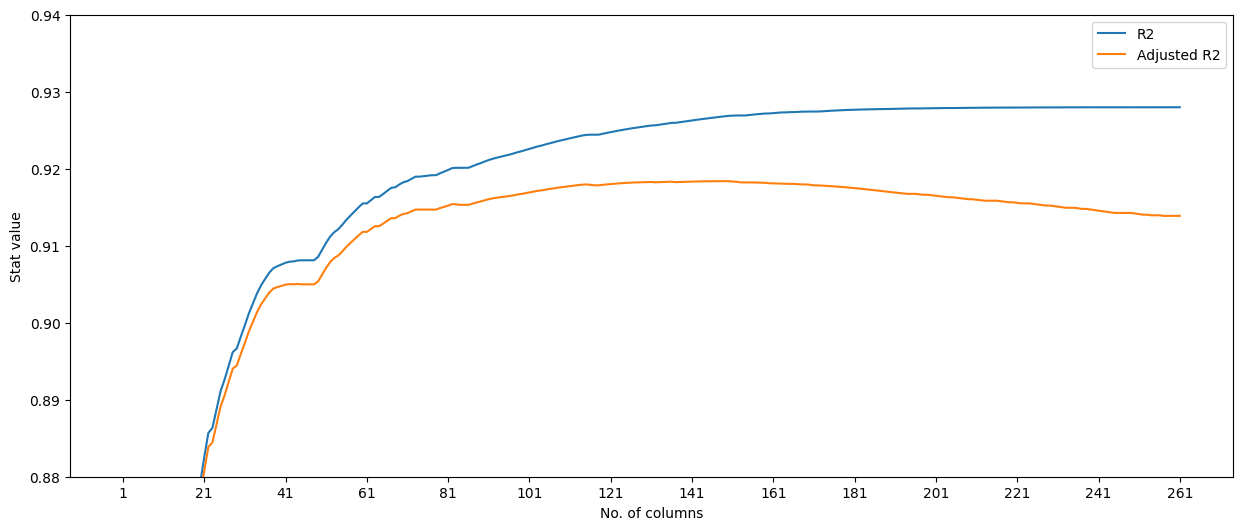

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

x_ticklabels = range(int(len(df_models.index)), int(df_models.index[-1]), int(int(len(df_models.index)) / 2))

ax = sns.lineplot(x=df_models.index[::-1], y=df_models.R2.iloc[::-1], label="R2")
ax = sns.lineplot(x=df_models.index[::-1], y=df_models.adjR2.iloc[::-1], label="Adjusted R2")

ax.set_xticks(np.arange(len(df_models.index), step=20))
ax.set_xlabel("No. of columns")
ax.set_ylabel("Stat value")
plt.legend()
ax.set(ylim=(.88, .94));

In [ ]:
pd.options.display.float_format = '{:.6f}'.format

best_fit_cols_num = "40"
best_fit_cols_list = df_models.loc[best_fit_cols_num]["Features"][0].tolist()

best_fit_cols = df[[*best_fit_cols_list]]
best_fit_cols.insert(len(best_fit_cols.columns), label, df[label])
best_fit_cols

,GarageFinish-Fin,RoofMatl-Tar&Grv,RoofMatl-Membran,Condition1-Norm,LandSlope-Sev,MSZoning-FV,BsmtQual-TA,KitchenAbvGr,BedroomAbvGr,PoolArea,Functional-Typ,Street-Grvl,SaleType-COD,BsmtExposure-Mn,BsmtExposure-Av,KitchenQual-TA,ExterQual-Gd,RoofMatl-WdShngl,TotalBsmtSF,BsmtQual-Gd,ExterQual-TA,SaleType-WD,GarageArea,KitchenQual-Gd,Neighborhood-Crawfor,Neighborhood-NridgHt,BldgType-1Fam,BsmtExposure-No,Neighborhood-StoneBr,LotArea,Neighborhood-NoRidge,BsmtFinSF1,OverallQual,OverallCond,YearBuilt,one_1stFlrSF,Condition2-PosN,RoofMatl-ClyTile,two_2ndFlrSF,SalePrice
0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.125062,1.000000,0.000000,1.000000,0.308426,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.033420,0.000000,0.125089,0.625000,0.428571,0.946154,0.098260,0.000000,0.000000,0.413559,0.240644
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.192673,1.000000,1.000000,1.000000,0.238474,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.038795,0.000000,0.173281,0.500000,0.857143,0.738462,0.193700,0.000000,0.000000,0.000000,0.203128
2,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.135720,1.000000,0.000000,1.000000,0.356121,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.046507,0.000000,0.086109,0.625000,0.428571,0.930769,0.113305,0.000000,0.000000,0.419370,0.261487
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108410,0.000000,1.000000,1.000000,0.383148,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.038561,0.000000,0.038271,0.625000,0.428571,0.269231,0.122943,0.000000,0.000000,0.366102,0.145464
4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.173189,1.000000,0.000000,1.000000,0.537361,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.060576,1.000000,0.116052,0.750000,0.428571,0.923077,0.166197,0.000000,0.000000,0.509927,0.298308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.141216,1.000000,1.000000,1.000000,0.238474,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.030929,0.000000,0.000000,0.500000,0.428571,0.915385,0.121063,0.000000,0.000000,0.336077,0.194096
1334,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.239301,1.000000,1.000000,1.000000,0.270270,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.055505,0.000000,0.139972,0.500000,0.571429,0.753846,0.384344,0.000000,0.000000,0.000000,0.242728
1335,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174355,0.000000,0.000000,1.000000,0.073132,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.036187,0.000000,0.048724,0.625000,1.000000,0.469231,0.176305,0.000000,0.000000,0.557869,0.321235
1336,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.162032,0.000000,1.000000,1.000000,0.063593,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.039342,0.000000,0.008682,0.375000,0.571429,0.538462,0.150447,0.000000,0.000000,0.000000,0.1484

In [ ]:
# best_fit_cols = mlr_prepare(best_fit_cols)
results = mlr(mlr_prepare(best_fit_cols), label)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     326.8
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        15:40:10   Log-Likelihood:                 2652.7
No. Observations:                1338   AIC:                            -5225.
Df Residuals:                    1298   BIC:                            -5017.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
GarageFinish-Fin         0.0044 

## Optimize best fit columns

In [ ]:
_, problem_cols = create_problem_cols_df(best_fit_cols, label)
get_high_skew_cols(problem_cols, best_fit_cols)
get_high_p_val_cols(problem_cols, best_fit_cols)
get_high_het_p_cols(problem_cols, best_fit_cols)

problem_cols.drop(columns=["-"], inplace=True)
problem_cols.dropna(how="all", inplace=True)

for problem_col in problem_cols.index.values:
  if problem_col not in best_fit_cols:
    problem_cols.drop(labels=[problem_col], axis=0, inplace=True)

In [ ]:
def fix_high_skew_cols(df, problem_df):
  for i, skew_val in enumerate(problem_df["skewness"]):
    if math.isnan(skew_val): continue

    col_name = problem_df.index[i]

    df[col_name] = df[col_name] + 2
    df[col_name] = np.sqrt(df[col_name])

  return df

best_fit_cols_copy = fix_high_skew_cols(best_fit_cols.copy(), problem_cols)
best_fit_cols_copy

,GarageFinish-Fin,RoofMatl-Tar&Grv,RoofMatl-Membran,Condition1-Norm,LandSlope-Sev,MSZoning-FV,BsmtQual-TA,KitchenAbvGr,BedroomAbvGr,PoolArea,Functional-Typ,Street-Grvl,SaleType-COD,BsmtExposure-Mn,BsmtExposure-Av,KitchenQual-TA,ExterQual-Gd,RoofMatl-WdShngl,TotalBsmtSF,BsmtQual-Gd,ExterQual-TA,SaleType-WD,GarageArea,KitchenQual-Gd,Neighborhood-Crawfor,Neighborhood-NridgHt,BldgType-1Fam,BsmtExposure-No,Neighborhood-StoneBr,LotArea,Neighborhood-NoRidge,BsmtFinSF1,OverallQual,OverallCond,YearBuilt,one_1stFlrSF,Condition2-PosN,RoofMatl-ClyTile,two_2ndFlrSF,SalePrice
0,1.414214,1.414214,1.414214,1.732051,1.414214,1.414214,0.000000,1.414214,0.500000,1.414214,1.732051,1.414214,1.414214,1.414214,1.414214,0.000000,1.000000,1.414214,1.457759,1.000000,0.000000,1.732051,0.308426,1.000000,1.414214,1.414214,1.732051,1.000000,1.414214,1.425980,1.414214,1.457768,0.625000,0.428571,0.946154,1.448537,1.414214,1.414214,0.413559,1.496878
1,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,0.500000,1.414214,1.732051,1.414214,1.414214,1.414214,1.414214,1.000000,0.000000,1.414214,1.480768,1.000000,1.000000,1.732051,0.238474,0.000000,1.414214,1.414214,1.732051,0.000000,1.414214,1.427864,1.414214,1.474205,0.500000,0.857143,0.738462,1.481114,1.414214,1.414214,0.000000,1.484294
2,1.414214,1.414214,1.414214,1.732051,1.414214,1.414214,0.000000,1.414214,0.500000,1.414214,1.732051,1.414214,1.414214,1.732051,1.414214,0.000000,1.000000,1.414214,1.461410,1.000000,0.000000,1.732051,0.356121,1.000000,1.414214,1.414214,1.732051,0.000000,1.414214,1.430562,1.414214,1.444337,0.625000,0.428571,0.930769,1.453721,1.414214,1.414214,0.419370,1.503824
3,1.414214,1.414214,1.414214,1.732051,1.414214,1.414214,1.000000,1.414214,0.500000,1.414214,1.732051,1.414214,1.414214,1.414214,1.414214,0.000000,0.000000,1.414214,1.452036,0.000000,1.000000,1.732051,0.383148,1.000000,1.732051,1.414214,1.732051,1.000000,1.414214,1.427782,1.414214,1.427680,0.625000,0.428571,0.269231,1.457032,1.414214,1.414214,0.366102,1.464740
4,1.414214,1.414214,1.414214,1.732051,1.414214,1.414214,0.000000,1.414214,0.666667,1.414214,1.732051,1.414214,1.414214,1.414214,1.732051,0.000000,1.000000,1.414214,1.474174,1.000000,0.000000,1.732051,0.537361,1.000000,1.414214,1.414214,1.732051,0.000000,1.414214,1.435471,1.732051,1.454666,0.750000,0.428571,0.923077,1.471800,1.414214,1.414214,0.509927,1.516017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1.414214,1.414214,1.414214,1.732051,1.414214,1.414214,0.000000,1.414214,0.500000,1.414214,1.732051,1.414214,1.414214,1.414214,1.414214,1.000000,0.000000,1.414214,1.463289,1.000000,1.000000,1.732051,0.238474,0.000000,1.414214,1.414214,1.732051,1.000000,1.414214,1.425106,1.414214,1.414214,0.500000,0.428571,0.915385,1.456387,1.414214,1.414214,0.336077,1.481248
1334,1.414214,1.414214,1.414214,1.732051,1.414214,1.414214,0.000000,1.414214,0.500000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.000000,0.000000,1.414214,1.496429,1.000000,1.000000,1.732051,0.270270,0.000000,1.414214,1.414214,1.732051,1.000000,1.414214,1.433703,1.414214,1.462864,0.500000,0.571429,0.753846,1.544132,1.414214,1.414214,0.000000,1.497574
1335,1.414214,1.414214,1.414214,1.732051,1.414214,1.414214,1.000000,1.414214,0.666667,1.414214,1.732051,1.414214,1.414214,1.414214,1.414214,0.000000,0.000000,1.414214,1.474569,0.000000,0.000000,1.732051,0.073132,1.000000,1.732051,1.414214,1.732051,1.000000,1.414214,1.426950,1.414214,1.431337,0.625000,1.000000,0.469231,1.475230,1.414214,1.414214,0.557869,1.523560
1336,1.414214,1.414214,1.414214,1.732051,1.414214,1.414214,1.000000,1.414214,0.333333,1.414214,1.732051,1.414214,1.414214,1.732051,1.414214,0.000000,0.000000,1.414214,1.470385,0.000000,1.000000,1.732051,0.063593,1.000000,1.414214,1.414214,1.732051,0.000000,1.414214,1.428055,1.414214,1.417280,0.375000,0.571429,0.538462,1.466440,1.414214,1.414214,0.000000,1.4657

In [ ]:
_, problem_cols = create_problem_cols_df(best_fit_cols_copy, label)
get_high_skew_cols(problem_cols, best_fit_cols_copy)
get_high_p_val_cols(problem_cols, best_fit_cols_copy)
get_high_het_p_cols(problem_cols, best_fit_cols_copy)

problem_cols.drop(columns=["-"], inplace=True)
problem_cols.dropna(how="all", inplace=True)

for problem_col in problem_cols.index.values:
  if problem_col not in best_fit_cols_copy:
    problem_cols.drop(labels=[problem_col], axis=0, inplace=True)
problem_cols

,skewness,p_value,white_lm_p,white_f_p,breusch_lm_p,breusch_f_p
GarageFinish-Fin,1.108353,None,0.000000,0.000000,0.000000,0.000000
Condition1-Norm,-2.182754,None,0.000000,0.000000,0.000000,0.000000
MSZoning-FV,4.321005,None,0.000000,0.000000,0.000000,0.000000
BsmtQual-TA,NaN,None,0.000000,0.000000,0.000000,0.000000
KitchenAbvGr,5.874832,None,NaN,NaN,NaN,NaN
PoolArea,14.115194,None,0.000034,0.000034,0.000034,0.000034
Functional-Typ,-3.608982,None,0.000034,0.000034,0.000034,0.000034
SaleType-COD,5.380934,None,0.000034,0.000034,0.000034,0.000034
BsmtExposure-Av,1.865160,None,0.000034,0.000034,0.000034,0.000034
KitchenQual-TA,NaN,None,0.000000,0.000000,0.000000,0.000000


In [ ]:
results = mlr(mlr_prepare(best_fit_cols_copy), label)
_, fit_dict = mlr_fit_stats(results, best_fit_cols_copy[label], make_dict=True)
print(fit_dict)
print(results.summary())

{'R2': 0.8595503183, 'adjR2': 0.8561063414, 'R2_adjR2_diff': 0.0034439769, 'MAE': 1.2594612115, 'RMSE': 1.2615785285, 'Features': [array(['TotalBsmtSF', 'BedroomAbvGr', 'KitchenAbvGr', 'PoolArea',
       'GarageFinish-Fin', 'ExterQual-Gd', 'BsmtExposure-Av',
       'ExterQual-TA', 'MSZoning-FV', 'SaleType-WD', 'SaleType-COD',
       'Functional-Typ', 'BsmtQual-TA', 'GarageArea', 'KitchenQual-TA',
       'Condition1-Norm', 'KitchenQual-Gd', 'BsmtFinSF1', 'BsmtQual-Gd',
       'LotArea', 'BsmtExposure-No', 'Neighborhood-Crawfor',
       'RoofMatl-WdShngl', 'OverallCond', 'BldgType-1Fam',
       'Neighborhood-NridgHt', 'Neighborhood-StoneBr',
       'Neighborhood-NoRidge', 'OverallQual', 'YearBuilt', 'one_1stFlrSF',
       'two_2ndFlrSF'], dtype=object)]}
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
